In [1]:
__nbid__ = '0074'
__author__ = 'Stephanie Juneau <stephanie.juneau@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>', 'Astro DataLab Team <datalab@noirlab.edu>'
__version__ = '20251205' # yyyymmdd
__datasets__ = ['desi_dr1'] 
__keywords__ = ['sparcl', 'spectra', 'database']

# Introducción a la Primera Publicación de Datos (DR1) de DESI en el Astro Data Lab

*Stéphanie Juneau (NOIRLab), Ragadeepika Pucha (U. Utah), Alice Jacques (NOIRLab), Benjamin Weaver (NOIRLab), David Herrera (NOIRLab) y el equipo de Astro Data Lab, con contribuciones de Anthony Kremin (LBL), Jaime E. Forero Romero (U. de los Andes), Stephen Bailey (LBL), y la Colaboración DESI*

#### (_Traducción de [01_Intro_to_DESI_DR1.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/DESI/01_Intro_to_DESI_DR1.ipynb)_)

### Tabla de Contenido

* [Objetivos y resumen](#goals)
* [Avisos legales y atribuciones](#attribution)
* [Importaciones](#import)
* [Autenticación](#auth)
* [Base de datos DESI DR1](#desi_dr1)
* [Accediendo a los objetos de DESI](#desi_target_access)
    * [Seleccionando objetos según información de selección](#target_info)
    * [Seleccionando objetos en una región del cielo](#hpx_sel)
* [Accediendo y graficando los espectros de un objeto dado](#spectra_access)
* [Objetos con múltiples espectros combinados](#multiple_spectra)
* [Referencias](#ref)

<a class="anchor" id="goals"></a>

# Objetivos

En este notebook exploraremos la Primera Publicación de Datos (DR1) de DESI en el Astro Data Lab. En particular, mostraremos cómo acceder al catálogo de corrimientos al rojo desde la base de datos del Data Lab, cómo separar objetos según la información de selección de DESI, cómo acceder a todos los espectros disponibles para un objeto dado utilizando el Laboratorio de Análisis Espectral y Catálogo Recuperable, [SPARCL](https://astrosparcl.datalab.noirlab.edu/sparc/), por sus siglas en inglés (SPectra Analysis and Retrievable Catalog Lab), y cómo graficar el espectro "óptimo". Finalmente, mostraremos cómo consultar objetos con más de un espectro combinado en el survey principal de DESI.

# Resumen

El Instrumento Espectroscópico de Energía Oscura (DESI, por sus siglas en inglés) es un espectrógrafo multiobjeto con 5000 fibras construido por el Departamento de Energía (DOE). Está instalado en el telescopio Mayall de 4 metros en Kitt Peak, Arizona, y se utiliza para realizar un survey que abarca aproximadamente 14,000 grados cuadrados del cielo durante 5 años (2021–2026). La Primera Publicación de Datos (DR1) de DESI consiste en espectros de 18 millones de objetos únicos observados durante los primeros 13 meses de el survey principal de DESI ("Año 1"). También incluye un reprocesamiento de los mismos datos de comisionamiento y validación de el survey (SV) que ya habían sido incluidos en DESI EDR. Esto incluye SV1, SV2 y SV3 (el survey del Uno por Ciento). El nombre de la base de datos con las tablas de catálogos de DESI DR1 es `desi_dr1`. Más información sobre DR1 está disponible tanto en el [sitio de documentación de datos de DESI](https://data.desi.lbl.gov/doc/) como en la [página de DESI en el Astro Data Lab](https://datalab.noirlab.edu/desi/).

En este notebook, mostramos cómo acceder a las diferentes tablas asociadas a esta base de datos para obtener información sobre selección de objetos y corrimientos al rojo de los objetos, y luego usar la base espectral SPARCL para recuperar los espectros. Nos enfocamos en ejemplos dentro del survey principal, aunque podrían extenderse a los datos SV consultando las columnas específicas de SV y correspondientemente adaptando el código.

<a class="anchor" id="attribution"></a>

# Avisos Legales y Atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----

# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL (Juneau et al. 2024)}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

For this notebook specifically, please acknowledge:
* DESI data license and acknowledgments: https://data.desi.lbl.gov/doc/acknowledgments/
* Astro Data Lab: https://datalab.noirlab.edu/acknowledgments.php
* SPARCL: https://astrosparcl.datalab.noirlab.edu/sparc/acknowledgments

<a class="anchor" id="import"></a>

# Importaciones

In [1]:
# Importar algunos paquetes útiles de Python
import numpy as np
from astropy.table import Table
from astropy.convolution import convolve, Gaussian1DKernel
import matplotlib 
import matplotlib.pyplot as plt
from getpass import getpass

# Máscaras de selección de DESI - 
from desitarget import targetmask            # Para el sruvey principal
from desitarget.sv1 import sv1_targetmask    # Para SV1
from desitarget.sv2 import sv2_targetmask    # Para SV2
from desitarget.sv3 import sv3_targetmask    # Para SV3

## Módulos relacionados con Data Lab
from sparcl.client import SparclClient
from dl import authClient as ac, queryClient as qc

<a class="anchor" id="auth"></a>

# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [2]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

In [2]:
# Mejorando la apariencia de los gráficos con matplotlib
settings = {
    'font.size':16,
    'axes.linewidth':2.0,
    'xtick.major.size':6.0,
    'xtick.minor.size':4.0,
    'xtick.major.width':2.0,
    'xtick.minor.width':1.5,
    'xtick.direction':'in', 
    'xtick.minor.visible':True,
    'xtick.top':True,
    'ytick.major.size':6.0,
    'ytick.minor.size':4.0,
    'ytick.major.width':2.0,
    'ytick.minor.width':1.5,
    'ytick.direction':'in', 
    'ytick.minor.visible':True,
    'ytick.right':True
}

plt.rcParams.update(**settings)

In [3]:
# Cargar el cliente de SPARCL
client = SparclClient()

announcement=Data set deprecation notice: on November 19, 2025 the SDSS/BOSS DR16 data sets were deprecated. Please use the new SDSS/BOSS DR17 data sets instead.


<a class="anchor" id="desi_dr1"></a>
# Base de datos DESI DR1

El esquema de la base de datos `desi_dr1` en el Data Lab consiste en varias tablas asociadas con los objetos.

In [4]:
print(qc.schema('desi_dr1'))


Schema: desi_dr1

      Table Name   Description
      ----------   -----------
          agnqso   Value-Added Catalog of DESI DR1 galaxies and quasars with 
                   spectral and infrared classification diagnostics (17,995,5
                   99 rows)
        exposure   Summary quantities for every DESI exposure (9,176 rows)
     fiberassign   Quantities obtained when a DESI target is assigned to a fi
                   ber (25,061,082 rows)
           frame   Summary quantities for each petal of the DESI instrument i
                   n a given exposure; in normal operation there are ten fram
                   es for every exposure (269,960 rows)
             mws   Milky Way Survey Value-Added Catalog (6,372,607 rows)
      photometry   Photometric quantities from LS DR9 for every TARGETID (76,
                   001,458 rows)
       potential   For a given tile, this table lists all targets that could 
                   have received a fiber assignment (168,392,774 ro

Nos enfocaremos en la tabla `zpix` en este notebook. Esta es el principal catálogo de corrimientos al rojo de el survey DESI. Contiene la información espectroscópica del objeto basada en espectros combinados, y se organiza por *healpix*. También contiene información de selección de objetos.

A continuación vemos las columnas disponibles en esta tabla.

In [5]:
# Columnas en la tabla zpix
print(qc.schema('desi_dr1.zpix'))


Schema: desi_dr1
 Table: zpix

     Column Name   Description
     -----------   -----------
               z   Redshift measured by Redrock
            zerr   Redshift error from Redrock
            chi2   Best fit chi squared
         coeff_0   Redrock template coefficients
         coeff_1   Redrock template coefficients
         coeff_2   Redrock template coefficients
         coeff_3   Redrock template coefficients
         coeff_4   Redrock template coefficients
         coeff_5   Redrock template coefficients
         coeff_6   Redrock template coefficients
         coeff_7   Redrock template coefficients
         coeff_8   Redrock template coefficients
         coeff_9   Redrock template coefficients
       deltachi2   Delta-chi-squared for template fit from Redrock
   mean_fiber_ra   Mean (over exposures) RA of actual fiber position
  mean_fiber_dec   Mean (over exposures) DEC of actual fiber position
            elon   Ecliptic longitude
            elat   Ecliptic latitude


<a class="anchor" id="desi_target_access"></a>
# Accediendo a los objetos de DESI

Los espectros de DESI están identificados de forma única por tres atributos:

* **targetid**: identificador único para un objeto dado  
* **survey**: survey en el que fue observado el objeto. Puede ser _main_, _sv1_, _sv2_, o _sv3_.  
* **program**: programa de observación asociado a las condiciones planificadas: _dark_, _bright_, o _backup_

Las diferentes observaciones espectrales de un mismo objeto se combinan (*coadd*) dentro de cada combinación de survey y program.  
Por lo tanto, algunos objetos pueden tener múltiples espectros combinados, y cada uno está asociado a un `targetid`, `survey` y `program`.  
El espectro "óptimo" para un objeto se indica con la columna `zcat_primary`.

Más información sobre el modelo de datos de los catálogos de corrimientos al rojo está disponible [aquí](https://desidatamodel.readthedocs.io/en/latest/DESI_SPECTRO_REDUX/SPECPROD/zcatalog/zpix-SURVEY-PROGRAM.html#).

En esta consulta, seleccionaremos objetos de el survey principal (`survey='main'`).  
Dado que la tabla `zpix` es muy grande, con 23 millones de filas, obtendremos solo un 10% distribuido aleatoriamente en el cielo, aplicando un corte sobre `random_id` (ID aleatorio en el rango de 0.0 a 100.0).

In [6]:
# Escribir una consulta para seleccionar el espectro primario en el survey Principal para el 10% de la muestra
# (ver información detallada más abajo)
query = """
        SELECT zp.targetid, zp.survey, zp.program, zp.desi_target, 
               zp.mean_fiber_ra, zp.mean_fiber_dec, 
               zp.z, zp.zwarn, zp.spectype
        FROM desi_dr1.zpix AS zp
        WHERE (zp.survey='main') AND zp.main_primary AND (zp.random_id BETWEEN 0. AND 10.)
        """ 

# Información sobre la consulta
# 
# Columnas seleccionadas --
# targetid, survey, program -- identificadores únicos para un espectro dado
##   desi_target -- codifica la información de selección de objetos en el survey principal de DESI (explicado en detalle más abajo)
##   mean_fiber_ra, mean_fiber_dec -- coordenadas donde se colocó la fibra
##   z -- corrimiento al rojo espectroscópico del objeto
##   zwarn -- información codificada sobre el redshift (zwarn = 0 es bueno)
##   spectype -- tipo espectral del objeto: STAR | GALAXY | QSO
## Restricciones (cláusula WHERE) --
##   survey: selecciona solo objetos del survey principal
##   zcat_primary: conserva solo el mejor espectro en Main (evita posibles duplicados)
##   random_id: selecciona un subconjunto del 10% de la muestra (0–10 de 100)

In [7]:
print(query)


        SELECT zp.targetid, zp.survey, zp.program, zp.desi_target, 
               zp.mean_fiber_ra, zp.mean_fiber_dec, 
               zp.z, zp.zwarn, zp.spectype
        FROM desi_dr1.zpix AS zp
        WHERE (zp.survey='main') AND zp.main_primary AND (zp.random_id BETWEEN 0. AND 10.)
        


In [8]:
zpix_cat = qc.query(sql = query, fmt = 'table')

In [9]:
print(f"La tabla resultante tiene {len(zpix_cat)} filas y representa el 10% del tamaño de la muestra")
zpix_cat[0:5]

La tabla resultante tiene 2063506 filas y representa el 10% del tamaño de la muestra


targetid,survey,program,desi_target,mean_fiber_ra,mean_fiber_dec,z,zwarn,spectype
int64,str4,str6,int64,float64,float64,float64,int64,str6
39628129664239940,main,dark,65537,234.7166322469532,14.27766943485698,0.6129316573380434,0,GALAXY
39627660451645263,main,dark,917542,146.505791478883,-5.361541128676229,2.274544489801376,0,QSO
39632981819656750,main,dark,1028,250.8452391416031,34.96682360092108,3.026060340852765,0,QSO
39628310233219875,main,dark,65537,36.75448828509968,22.26330131482691,0.5896048730671053,0,GALAXY
39627715627715582,main,dark,655394,201.3880181513268,-2.939781972005333,1.541882595749106,0,GALAXY


In [10]:
# Verificar que las filas tengan TARGETIDs únicos (sólo un espectro PRIMARIO por objeto)
Ntot = len(zpix_cat)
print(f"N° total de filas: {Ntot}")
print(f"N° de filas con TARGETIDs únicos: {len(np.unique(zpix_cat['targetid']))}")

N° total de filas: 2063506
N° de filas con TARGETIDs únicos: 2063506


In [11]:
## Verificar los tipos espectrales
spectypes = np.unique(zpix_cat['spectype'])

for spectype in spectypes:
    Nspectype = len(zpix_cat[zpix_cat['spectype']==spectype])
    # Porcentaje redondeado a 1 decimal
    percent = np.round(Nspectype/Ntot*100, 1)
    print(f"TIPO ESPECTRAL = {spectype} incluye N={Nspectype} ({percent}%)")


TIPO ESPECTRAL = GALAXY incluye N=1479652 (71.7%)
TIPO ESPECTRAL = QSO incluye N=165098 (8.0%)
TIPO ESPECTRAL = STAR incluye N=418756 (20.3%)


<a class="anchor" id="target_info"></a>
## Seleccionando objetos según información de selección

Los objetos de DESI se dividen en cinco clases principales:  
* MWS: Milky Way Survey (Survey de la Vía Lactea) — este survey observa “estrellas” en la Vía Láctea  
* BGS: Bright Galaxy Survey (Survey de Galaxias Brillantes) — este survey observa las galaxias brillantes en el universo cercano  
* LRG: Luminous Red Galaxies  (Galaxias Rojas Luminosas)
* ELG: Emission Line Galaxies  (Galaxias con Líneas de Emisión)
* QSO: Quásares  

[Myers et al. 2023](https://ui.adsabs.harvard.edu/abs/2023AJ....165...50M/abstract) describe en más detalle la selección de objetos y su información.  

Las columnas `*DESI_TARGET` codifican a qué clase(s) pertenece cada objeto. En esta sección mostramos cómo seleccionar objetos según esa información de selección.  

Las máscaras de objetos de DESI contienen la codificación binaria para las distintas clases de selección. Además de estas clases principales, hay objetos que forman parte de programas de fibra secundaria; estos se codifican bajo `SECONDARY PROGRAM`.

In [12]:
# Bits de objetos de DESI codificadas en targetmask.desi_mask
targetmask.desi_mask

desi_mask:
  - [LRG,              0, "LRG", {'obsconditions': 'DARK', 'priorities': {'UNOBS': 3200, 'MORE_ZGOOD': 2, 'MORE_ZWARN': 2, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_MIDZQSO': 0}, 'numobs': 2}]
  - [ELG,              1, "ELG", {'obsconditions': 'DARK', 'priorities': {'UNOBS': 3000, 'MORE_ZGOOD': 2, 'MORE_ZWARN': 2, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_MIDZQSO': 0}, 'numobs': 2}]
  - [QSO,              2, "QSO", {'obsconditions': 'DARK', 'priorities': {'UNOBS': 3400, 'MORE_ZGOOD': 3350, 'MORE_ZWARN': 3300, 'MORE_MIDZQSO': 100, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0}, 'numobs': 4}]
  - [LGE,              3, "LRG for DESI extension", {'obsconditions': 'DARK1B', 'priorities': {'UNOBS': 3210, 'MORE_ZGOOD': 2, 'MORE_ZWARN': 2, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_MIDZQSO': 0}, 'numobs': 2}]
  - [QSO_HIZ,          4, "QSO selected using high-redshift Random Forest (informational bit)", {'obsconditions': 'DARK', 'priorities': {'UNOBS': 0, 'DONE': 0, 'OBS': 0, 'D

In [13]:
# Ejemplos de valores de máscara

print(targetmask.desi_mask.mask("STD_FAINT"), targetmask.desi_mask.mask("STD_BRIGHT"), targetmask.desi_mask.mask("STD_FAINT|STD_BRIGHT"))
print(2**33, 2**35, 2**33 + 2**35)

8589934592 34359738368 42949672960
8589934592 34359738368 42949672960


In [14]:
# La información de selección de DESI se almacena en la columna desi_target para el survey principal
#   - targetmask.desi_mask corresponde a DESI_TARGET
# NOTA: Existen columnas diferentes para las surveys SV (no usadas aquí, pero necesarias para combinar datos de SV y Main):
#  - sv1_targetmask.desi_mask corresponde a SV1_DESI_TARGET
#  - sv2_targetmask.desi_mask corresponde a SV2_DESI_TARGET
#  - sv3_targetmask.desi_mask corresponde a SV3_DESI_TARGET

desi_tgt = zpix_cat['desi_target']

## Máscaras de bits de DESI
desi_mask = targetmask.desi_mask

In [15]:
# Selección de objetos por clase

is_bgs = (desi_tgt & desi_mask['BGS_ANY'] != 0)
is_lrg = (desi_tgt & desi_mask['LRG'] != 0)
is_elg = (desi_tgt & desi_mask['ELG'] != 0)
is_qso = (desi_tgt & desi_mask['QSO'] != 0)
is_mws = (desi_tgt & desi_mask['MWS_ANY'] != 0)
is_scnd = (desi_tgt & desi_mask['SCND_ANY'] != 0)

In [16]:
# Número de objetos de cada clase

n_bgs = len(zpix_cat[is_bgs])
n_lrg = len(zpix_cat[is_lrg])
n_elg = len(zpix_cat[is_elg])
n_qso = len(zpix_cat[is_qso])
n_mws = len(zpix_cat[is_mws])
n_scnd = len(zpix_cat[is_scnd])

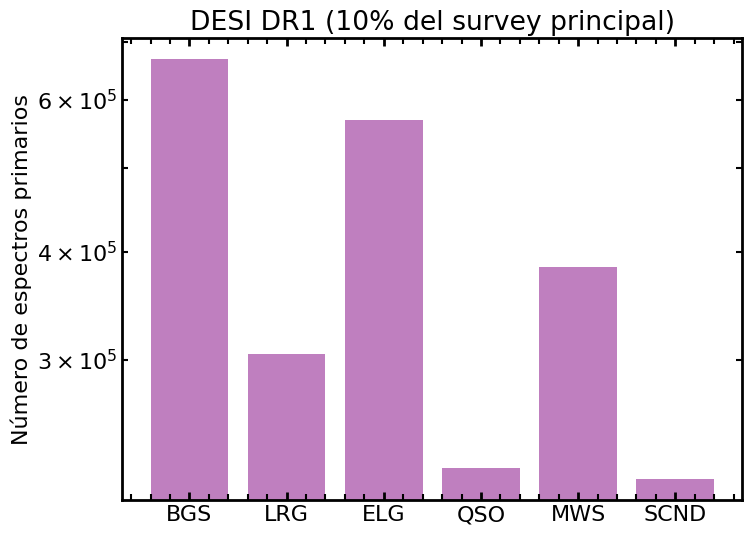

In [17]:
# Visualicemos los números gráficamente:

plt.figure(figsize = (8,6))

targets = ['BGS', 'LRG', 'ELG', 'QSO', 'MWS', 'SCND']
numbers = [n_bgs, n_lrg, n_elg, n_qso, n_mws, n_scnd]

plt.bar(targets, numbers, color = 'purple', alpha = 0.5)
plt.ylabel('Número de espectros primarios')
plt.yscale('log')
plt.title('DESI DR1 (10% del survey principal)');

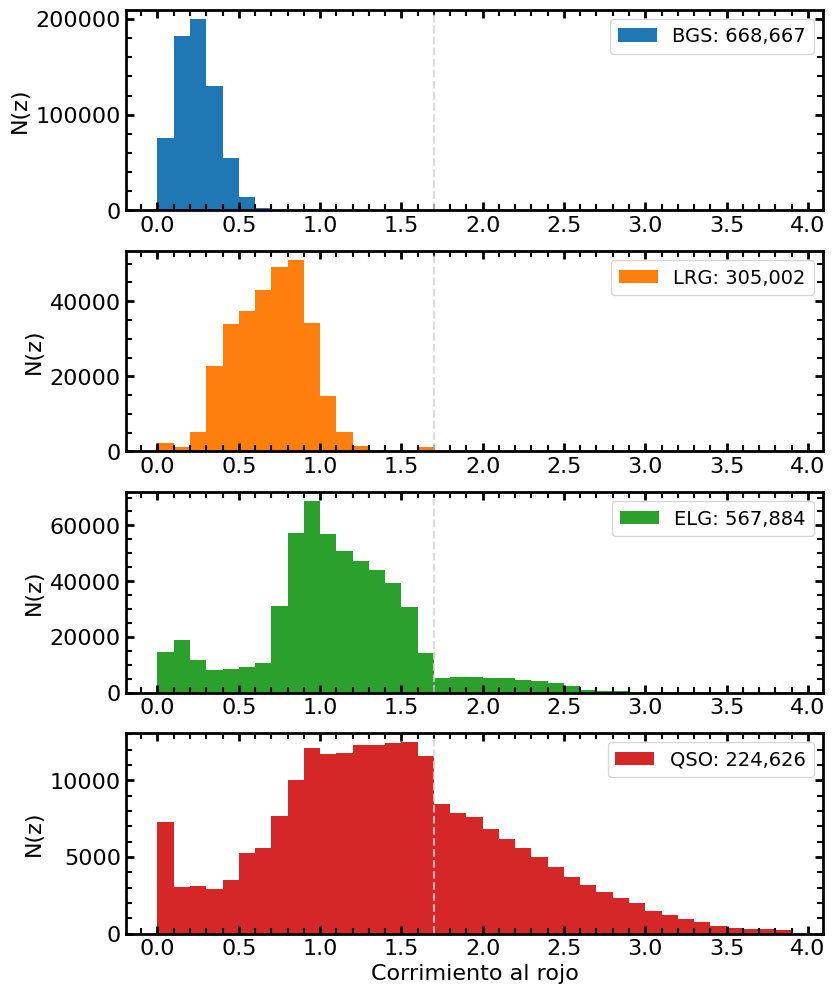

In [18]:
# Ahora veamos la distribución de corrimientos al rojo -

fig, axs = plt.subplots(4, 1, figsize=(9, 12))

# Definir los intervalos de corrimiento al rojo para los histogramas
bins = np.arange(0, 4, 0.1)

# Iteraremos sobre estas 4 clases de objetos
targets = [is_bgs, is_lrg, is_elg, is_qso]
colors = ['C0', 'C1', 'C2', 'C3']
labels = [f'BGS: {n_bgs:,}', f'LRG: {n_lrg:,}', f'ELG: {n_elg:,}', f'QSO: {n_qso:,}']

for i, target in enumerate(targets):
    axs[i].hist(zpix_cat['z'][target], color=colors[i], bins=bins, label=labels[i])
    axs[i].legend(fontsize=14)
    axs[i].set_ylabel("N(z)")

    # Línea vertical en el límite para el tipo GALAXY
    axs[i].axvline(1.7, ls='--', color='lightgrey', alpha=0.8)

# Añadir etiqueta del eje x en el último panel
axs[3].set_xlabel("Corrimiento al rojo");

### Otras máscaras

`desi_mask` contiene el nivel más alto de información de selección de objetos en DESI. Sin embargo, existen subclases de objetos. <br/>
Por ejemplo, BGS tiene diferentes máscaras de objetos según el criterio de selección. Cada una de las distintas propuestas de objetos secundarios tiene sus propias máscaras. Pueden seleccionarse de manera similar a lo anterior, pero usando las columnas correspondientes (como `BGS_TARGET` o `SCND_TARGET`) en la tabla `target`. Más información sobre las máscaras de bits en DESI está disponible [aquí](https://desidatamodel.readthedocs.io/en/latest/bitmasks.html).

In [19]:
## Máscaras de objetos BGS
targetmask.bgs_mask.names()

['BGS_FAINT',
 'BGS_BRIGHT',
 'BGS_WISE',
 'BGS_FAINT_HIP',
 'BGS_FAINT_NORTH',
 'BGS_BRIGHT_NORTH',
 'BGS_WISE_NORTH',
 'BGS_FAINT_SOUTH',
 'BGS_BRIGHT_SOUTH',
 'BGS_WISE_SOUTH']

In [20]:
## Máscaras de objetos secundarios
targetmask.scnd_mask.names()

['VETO',
 'UDG',
 'FIRST_MALS',
 'QSO_RED',
 'MWS_CLUS_GAL_DEEP',
 'LOW_MASS_AGN',
 'FAINT_HPM',
 'LOW_Z_TIER1',
 'LOW_Z_TIER2',
 'LOW_Z_TIER3',
 'BHB',
 'SPCV',
 'DC3R2_GAMA',
 'PSF_OUT_BRIGHT',
 'PSF_OUT_DARK',
 'HPM_SOUM',
 'SN_HOSTS',
 'GAL_CLUS_BCG',
 'GAL_CLUS_2ND',
 'GAL_CLUS_SAT',
 'MWS_FAINT_BLUE',
 'MWS_FAINT_RED',
 'STRONG_LENS',
 'WISE_VAR_QSO',
 'Z5_QSO',
 'MWS_RR_LYRAE',
 'MWS_MAIN_CLUSTER_SV',
 'BRIGHT_HPM',
 'WD_BINARIES_BRIGHT',
 'WD_BINARIES_DARK',
 'PV_BRIGHT_HIGH',
 'PV_BRIGHT_MEDIUM',
 'PV_BRIGHT_LOW',
 'PV_DARK_HIGH',
 'PV_DARK_MEDIUM',
 'PV_DARK_LOW',
 'GC_BRIGHT',
 'GC_DARK',
 'DWF_BRIGHT_HI',
 'DWF_BRIGHT_LO',
 'DWF_DARK_HI',
 'DWF_DARK_LO',
 'GD1_BRIGHT_PM',
 'GD1_FAINT_NO_PM',
 'GD1_FILLER',
 'BRIGHT_TOO_LOP',
 'BRIGHT_TOO_HIP',
 'DARK_TOO_LOP',
 'DARK_TOO_HIP']

<a class="anchor" id="hpx_sel"></a>
## Seleccionando objetos en una región del cielo

Los objetos están divididos en diferentes regiones healpix en el cielo.  
Aquí seleccionamos todos los objetos en una región healpix dada.  
También sobreponemos los objetos del `Survey de la Vía Láctea` en esta región.

In [21]:
hpx = 26279      

# Escribir consulta para seleccionar un healpix dado en el survey principal
query = f'''SELECT zp.targetid, zp.survey, zp.program, zp.desi_target,
                   zp.z, zp.zwarn, zp.spectype, 
                   zp.mean_fiber_ra, zp.mean_fiber_dec 
            FROM desi_dr1.zpix AS zp
            WHERE (healpix={hpx} AND survey='main' AND main_primary)'''

## Información sobre la consulta
##
## Columnas seleccionadas:
##   targetid, survey, program — identificadores únicos para un espectro dado
##   desi_target — codifica la información de selección de objetos de la survey principal
##   z — corrimiento al rojo espectroscópico del objeto
##   zwarn — información codificada sobre el redshift (zwarn = 0 es bueno)
##   spectype — tipo espectral del objeto: STAR | GALAXY | QSO
##   mean_fiber_ra, mean_fiber_dec — coordenadas donde se colocó la fibra
## Restricciones (cláusula WHERE):
##   healpix: selecciona un healpix específico
##   survey: mantiene solo la survey principal
##   main_primary: conserva el mejor espectro en el survey principal (en caso de duplicados)


In [22]:
tsel = qc.query(sql = query, fmt = 'table')

In [23]:
# Seleccionar objetos MWS en esta región
is_mws = (tsel['desi_target'] & targetmask.desi_mask['MWS_ANY'] != 0)

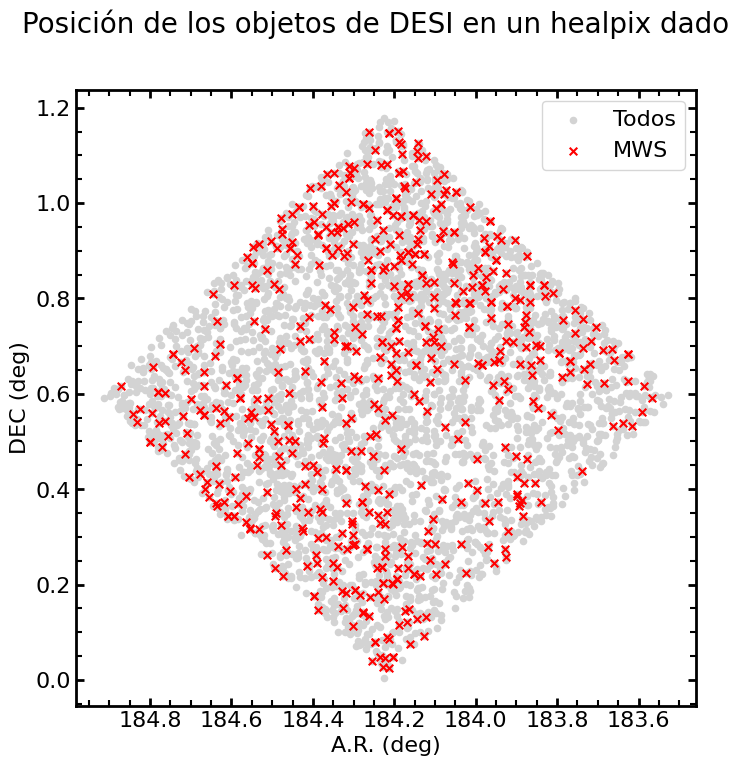

In [24]:
plt.figure(figsize = (8, 8))

plt.suptitle('Posición de los objetos de DESI en un healpix dado', fontsize = 20)
plt.scatter(tsel['mean_fiber_ra'], tsel['mean_fiber_dec'], color = 'lightgrey', s = 20, label = 'Todos')
plt.scatter(tsel['mean_fiber_ra'][is_mws], tsel['mean_fiber_dec'][is_mws], color = 'r', s = 30, marker = 'x', label = 'MWS')
plt.xlabel('A.R. (deg)')
plt.ylabel('DEC (deg)')
# La RA aumenta hacia la izquierda (Este)
plt.gca().invert_xaxis()
plt.legend();

<a class="anchor" id="spectra_access"></a>
# Accediendo y graficando los espectros de un objeto dado

Finalmente, mostramos cómo acceder a todos los espectros coadd-healpix de un objeto dado. También mostramos cómo seleccionar el espectro "óptimo".  
Utilizamos SPARCL, un servicio rápido de acceso espectral provisto por el Data Lab. Más detalles sobre el uso de SPARCL están disponibles en este [notebook de ejemplo](https://github.com/astro-datalab/notebooks-latest/blob/master/04_HowTos/SPARCL/How_to_use_SPARCL.ipynb).

In [25]:
# Seleccionar objetos con nspec > 5
query = '''SELECT targetid, survey, program, z, zwarn, coadd_fiberstatus, 
                  zcat_primary, zcat_nspec, tsnr2_lrg
           FROM desi_dr1.zpix
           WHERE zcat_nspec>5
        '''

tsel = qc.query(sql=query, fmt='table')

In [26]:
len(tsel)

782

In [27]:
# Seleccionar un objeto al azar

ii = 50
targetid = int(tsel['targetid'].data[ii])   # SPARCL acepta solo enteros Python

# Guardar una tabla con las filas que comparten el mismo targetid
tsel_id = tsel[tsel['targetid'] == tsel['targetid'][ii]]

In [28]:
# Recuperar espectros

inc = ['specid', 'redshift', 'flux', 'wavelength', 'spectype', 'specprimary', 'survey', 'program', 'targetid', 'redshift_warning']
res = client.retrieve_by_specid(specid_list = [targetid],
                                include = inc,
                                dataset_list = ['DESI-DR1'])

In [29]:
# Verificar que se hayan recuperado todos los espectros

print('Número de espectros combinados: ', tsel['zcat_nspec'].data[ii])
print('Número de registros recuperados: ', len(res.records))

Número de espectros combinados:  6
Número de registros recuperados:  6


In [30]:
res

Retrieved Results: 6 records

In [31]:
records = res.records

# Seleccionar el espectro primario
spec_primary = np.array([records[jj].specprimary for jj in range(len(records))])

primary_ii = np.where(spec_primary == True)[0][0]

In [32]:
lam_primary = records[primary_ii].wavelength
flam_primary = records[primary_ii].flux

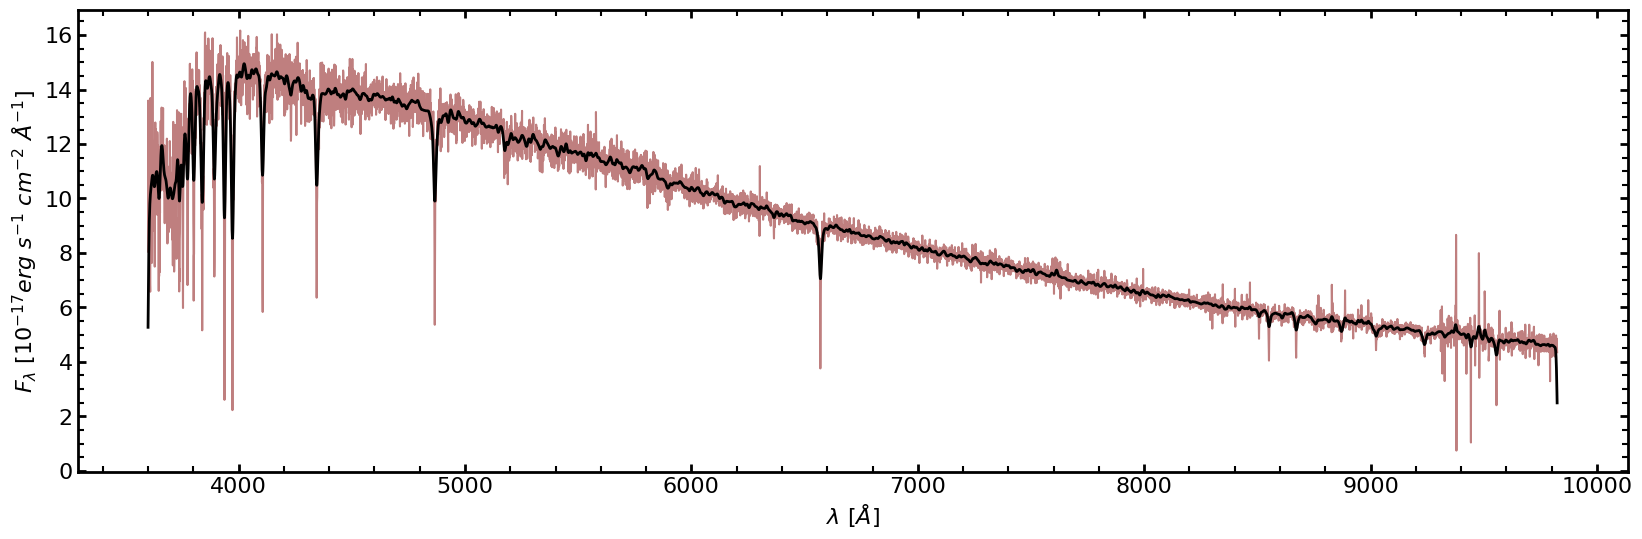

In [33]:
# Graficar este espectro

plt.figure(figsize = (20, 6))

# Graficar el espectro original en color vinotinto
plt.plot(lam_primary, flam_primary, color = 'maroon', alpha = 0.5)
# Graficando encima el espetro suavizado en negro
plt.plot(lam_primary, convolve(flam_primary, Gaussian1DKernel(5)), color = 'k', lw = 2.0)
plt.xlabel(r'$\lambda$ [$\AA$]')
plt.ylabel(r'$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')
plt.show()

Ahora graficaremos todos los espectros disponibles para este objeto. <br/>
En cada caso, se etiqueta el `survey`, el `program`, la bandera `primary` y la bandera `zwarn` correspondientes a cada espectro.

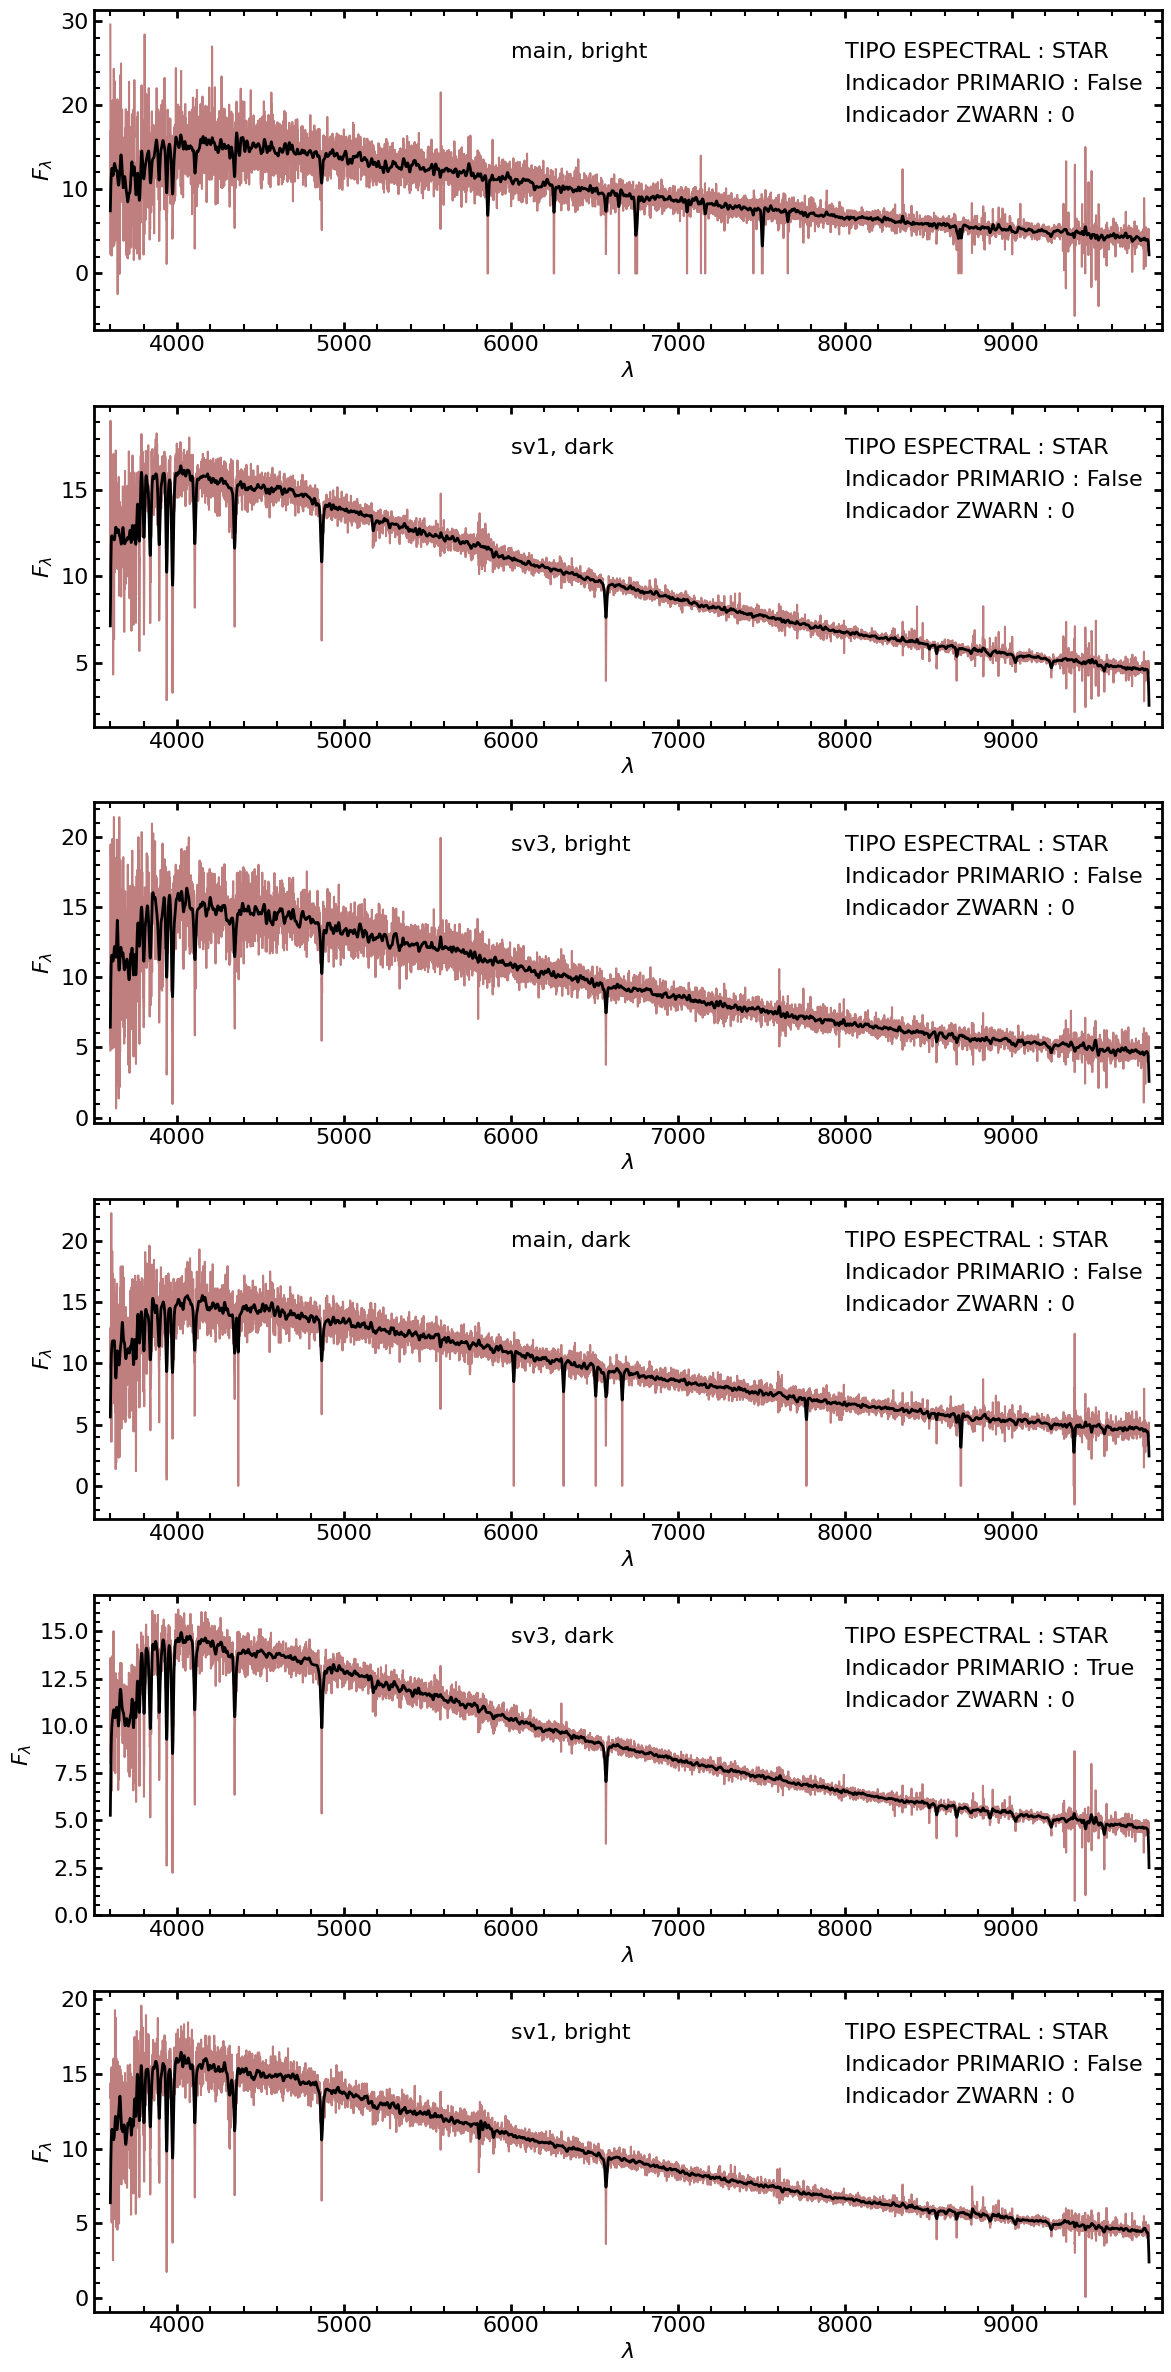

In [34]:
# Número de espectros 
n = len(records)

fig, ax = plt.subplots(n, 1, figsize = (12,(4*n)))

for jj in range(n):
    survey = records[jj].survey
    program = records[jj].program
    spectype = records[jj].spectype
    primary_flag = records[jj].specprimary
    zwarn_flag = records[jj].redshift_warning

    lam = records[jj].wavelength
    flam = records[jj].flux
    
    # Graficar el espectro combinado en color vinotinto
    ax[jj].plot(lam, flam, color = 'maroon', alpha = 0.5)
    # Graficando encima el espetro suavizado 
    ax[jj].plot(lam, convolve(flam, Gaussian1DKernel(5)), color = 'k', lw = 2.0)
    ax[jj].set(xlim = [3500, 9900], xlabel = r'$\lambda$', ylabel = r'$F_{\lambda}$')
    trans = ax[jj].get_xaxis_transform()
    ax[jj].annotate(f'{survey}, {program}', xy = (6000, 0.85), xycoords = trans, fontsize = 16)
    ax[jj].annotate(f'TIPO ESPECTRAL : {spectype}', xy = (8000, 0.85), xycoords = trans, fontsize = 16)
    ax[jj].annotate(f'Indicador PRIMARIO : {primary_flag}', xy = (8000, 0.75), xycoords = trans, fontsize = 16)
    ax[jj].annotate(f'Indicador ZWARN : {zwarn_flag}', xy = (8000, 0.65), xycoords = trans, fontsize = 16)
    
plt.tight_layout()

Del gráfico anterior, podemos ver que el espectro con `PRIMARY Flag = True` es el que tiene la relación señal/ruido más alta. Los otros espectros disponibles tienden a variar en calidad, siendo algunos más ruidosos en comparación con el espectro “óptimo”.  
Imprimamos la tabla con los valores de sus banderas de calidad, incluyendo `ZWARN` y `COADD_FIBERSTATUS`, para ver si alguno presenta advertencias. **Nota**: en algunos casos, si no hay datos válidos disponibles, el espectro aparece vacío con `ZWARN>0`.

In [35]:
tsel_id['targetid','survey','program','zwarn','coadd_fiberstatus','tsnr2_lrg','zcat_primary']

targetid,survey,program,zwarn,coadd_fiberstatus,tsnr2_lrg,zcat_primary
int64,str7,str6,int64,int64,float64,str1
39627751560317946,sv3,dark,0,0,358.0292,t
39627751560317946,main,bright,0,0,14.342091,f
39627751560317946,sv3,bright,0,0,47.464897,f
39627751560317946,sv1,bright,0,0,173.92639,f
39627751560317946,sv1,dark,0,0,329.90457,f
39627751560317946,main,dark,0,0,84.216095,f


**Notas:**
- `zwarn` contiene posibles advertencias o errores en el ajuste de corrimiento al rojo ([lista de definiciones de bits](https://desidatamodel.readthedocs.io/en/latest/bitmasks.html#zwarn-bit-definitions)).
- `coadd_fiberstatus` contiene [información sobre las condiciones de la fibra](https://desidatamodel.readthedocs.io/en/latest/bitmasks.html#spectroscopic-reduction-masks) durante las observaciones.
- Cuando todos los espectros tienen `zwarn=0`, el mejor se elige según el valor de `tsnr2_lrg`, que es un indicador de la profundidad alcanzada (relación señal/ruido) del espectro.

Si revisas los espectros anteriores, podrías notar que los más nítidos (con menos ruido) tienen valores mayores de `tsnr2_lrg`. Por ejemplo, los espectros en tiempo oscuro (“dark-time”) logran una señal más alta que los de tiempo brillante (“bright-time”).

<a class="anchor" id="multiple_spectra"></a>
## Objetos con múltiples espectros coadicionados

In [36]:
## Escribir una consulta para seleccionar todos los objetos de el survey principal con N>1 espectro (ver detalles más abajo)
q_multi = """
        SELECT targetid, survey, program, desi_target, 
               z, zwarn, coadd_fiberstatus, spectype, 
               CAST(main_primary AS int), main_nspec
        FROM desi_dr1.zpix
        WHERE (survey='main') AND (main_nspec>1)
        """

## Información sobre la consulta
##
## Columnas seleccionadas --
##   targetid, survey, program — identificadores únicos para un espectro dado
##   desi_target — codifica la información de selección de objetos de el survey principal
##   z — corrimiento al rojo espectroscópico del objeto
##   zwarn — información codificada sobre el redshift (zwarn = 0 es bueno)
##   coadd_fiberstatus — información codificada sobre la fibra asignada (0 es bueno)
##   spectype — tipo espectral del objeto: STAR | GALAXY | QSO
##   main_nspec — número de espectros combinados disponibles para un objeto
##   main_primary — indica si un espectro combinado es el primario (óptimo). main_primary = 1 para el “mejor”.
## Restricciones (cláusula WHERE) --
##   survey: selecciona solo la survey principal
##   main_nspec: mantiene objetos con más de un espectro en el survey principal
##               (p. ej., fueron observados en programas DARK y BRIGHT)

In [37]:
zmulti = qc.query(sql = q_multi, fmt = 'table')

In [38]:
print(f"La tabla resultante tiene {len(zmulti)} filas")
zmulti[0:5]

La tabla resultante tiene 508470 filas


targetid,survey,program,desi_target,z,zwarn,coadd_fiberstatus,spectype,main_primary,main_nspec
int64,str4,str6,int64,float64,int64,int64,str6,int64,int64
39633221406692395,main,bright,2305843009213694980,0.9276516309963582,0,0,QSO,0,2
39633221406692395,main,dark,2305843009213694980,0.9276960025538751,0,0,QSO,1,2
39633225433219765,main,bright,1152921504606847233,0.3977524124527504,0,0,GALAXY,0,2
39633225433219765,main,dark,1152921504606847233,0.3979740015739428,0,0,GALAXY,1,2
39633217363383452,main,bright,2305843017803628544,-0.0006240696655950223,0,0,STAR,0,2


In [39]:
is_primary = zmulti['main_primary']==1

print(f"N(filas) con MAIN_PRIMARY=True : {len(zmulti[is_primary])}")
print(f"N(filas) con MAIN_PRIMARY=False: {len(zmulti[~is_primary])}")

N(filas) con MAIN_PRIMARY=True : 254235
N(filas) con MAIN_PRIMARY=False: 254235


In [40]:
## Verificar cuántos por programa (y la fracción que es “primaria” = “mejor”)

programs = np.unique(zmulti['program'])
programs

for program in programs:
    is_prog = zmulti['program']==program
    is_mult = zmulti['main_nspec']>1
    N_prog = len(zmulti[is_prog])
    N_multiple = len(zmulti[is_prog&is_mult])
    N_primary = len(zmulti[is_prog&is_mult&is_primary])
    percent = np.round(N_primary/N_multiple*100, 1)

    print(f"Programa={program}")
    print(f"  {N_multiple} tienen >1 espectro; {N_primary} ({percent}%) son primarios")

Programa=bright
  254235 tienen >1 espectro; 3826 (1.5%) son primarios
Programa=dark
  254235 tienen >1 espectro; 250409 (98.5%) son primarios


**Nota**: Como se espera, los espectros de tiempo oscuro (“dark-time”) tienden a tener mayor calidad que los de tiempo claro (“bright-time”), por lo que normalmente se eligen como “mejor” espectro primario.

**Ejercicio**: Se podría profundizar para entender por qué, en una pequeña fracción de casos, el espectro de tiempo claro fue elegido como primario. ¿Hay algún problema con la condición de la fibra (`COADD_FIBERSTATUS>0`) y/o con la determinación de redshift (`ZWARN>0`) en los espectros de tiempo oscuro en esos casos?

<a class="anchor" id="ref"></a>
# Referencias

## Artículos
* Artículo DESI DR1: DESI Collaboration et al. 2025 (arXiv)  
* Artículo sobre el pipeline de selección de objetos de DESI: [Myers et al. 2023](https://ui.adsabs.harvard.edu/abs/2023AJ....165...50M/abstract)

## Enlaces útiles
* Documentación de datos de DESI: https://data.desi.lbl.gov/doc/  
* Acceso a DESI en Astro Data Lab: https://datalab.noirlab.edu/desi/  
* Información sobre SPARCL: https://astrosparcl.datalab.noirlab.edu/sparc/  
* Información del modelo de datos: https://desidatamodel.readthedocs.io/en/latest/  
* Información sobre máscaras de bits de DESI: https://desidatamodel.readthedocs.io/en/latest/bitmasks.html  
* Notebook de introducción a SPARCL: https://github.com/astro-datalab/notebooks-latest-es/blob/master/04_ComoHacer/SPARCL/Como_usar_SPARCL.ipynb  

---